<a href="https://colab.research.google.com/github/judgonzalezb/curso_computacion_cuantica/blob/patch-1/Proyecto_final/Julian_David_Gonzalez_Blanco/Julian_David_Gonzalez_Blanco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Julian David Gonzalez Blanco - cod. 20212678038

# Investigación

¿Que?

Resolución de problemas de satisfacibilidad mediante el algoritmo de Grover.

¿Como?

Hare uso del algoritmo de Grover para la resolución de problemas de satisfacibilidad, el problema de satisfacibilidad booleana es el problema de determinar si existe una interpretación que satisfaga una fórmula booleana dada.  En otras palabras, pregunta si las variables de una fórmula booleana determinada pueden reemplazarse consistentemente por los valores VERDADERO o FALSO de tal manera que la fórmula se evalúe como VERDADERO. Si este es el caso, la fórmula será satisfactoria. Por otro lado, si no existe tal asignación, la función expresada por la fórmula es FALSA para todas las posibles asignaciones de variables y la fórmula es insatisfactoria. Esto puede verse como un problema de búsqueda, donde la solución es la asignación donde se satisface la fórmula booleana.

¿Cuando?

Para este proyecto fue necesario investigar el algoritmo de Grover el cual fue inventado por Lov K. Grover en 1996, este algoritmo puede acelerar cuadráticamente un problema de búsqueda no estructurado, una aceleración cuadrática es de hecho un ahorro de tiempo sustancial para encontrar elementos marcados en listas largas.

¿Donde?

Inicialmente se implementará una simulación con Aer (aer_simulator), posteriormente se realizará el mayor esfuerzo para lograrlo con QPU (ibm-q).

- Compuertas usadas para la satisfactibilidad booleana:

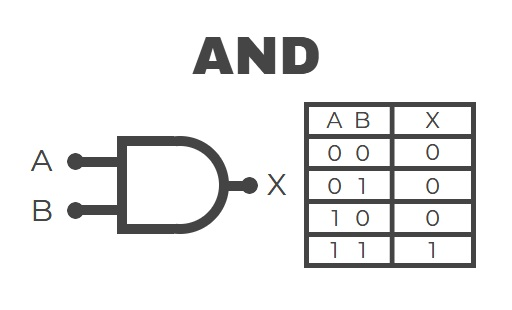

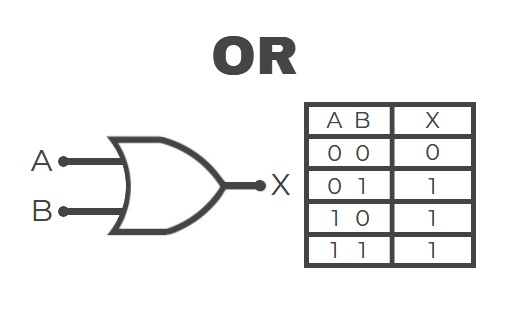

# Importaciones Generales

In [ ]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-2xty_jbf
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-2xty_jbf
     |████████████████████████████████| 1.6 MB 7.3 MB/s 
     |████████████████████████████████| 4.8 MB 44.0 MB/s 
     |████████████████████████████████| 12.8 MB 47.9 MB/s 
     |████████████████████████████████| 240 kB 58.4 MB/s 
     |████████████████████████████████| 106 kB 50.0 MB/s 
     |████████████████████████████████| 55 kB 3.4 MB/s 
     |████████████████████████████████| 37.5 MB 398 kB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 929 kB 60.1 MB/s 
     |████████████████████████████████| 50 kB 6.4 MB/s 
     |████████████████████████████████| 4.0 MB 44.7 MB/s 
     |████████████████████████████████| 1.9 MB 36.6 MB/s 

In [ ]:
import numpy as np
from qiskit import Aer
from qiskit.visualization import plot_histogram
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library import PhaseOracle

# Implementacion

In [ ]:
#creamos el archivo dimacs
with open("example.dimacs", "w") as f:
   f.write("c example DIMACS-CNF 3-SAT\n")
   f.write("p cnf 3 5\n")
   f.write("-1 -2 -3 0\n")
   f.write("1 -2 3 0\n")
   f.write("1 2 -3 0\n")
   f.write("1 -2 -3 0\n")
   f.write("-1 2 3 0")
   f.close()

In [ ]:
rutaArchivo = 'example.dimacs'

In [ ]:
with open(rutaArchivo, 'r') as f:
    dimacs = f.read()
print(dimacs)

oracle = PhaseOracle.from_dimacs_file(rutaArchivo)
oracle.draw()

c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0


q_0: ─o───────o───────────
      │ ┌───┐ │ ┌───┐┌───┐
q_1: ─■─┤ X ├─■─┤ X ├┤ Z ├
      │ ├───┤   └───┘└───┘
q_2: ─o─┤ Z ├─────────────
        └───┘

In [ ]:
#La funcion de este objeto es que se pueda usar para verificar si una asignacion (ceros y unos), satisface es archivo DIMACS cargado.
class Verificador():

    def __init__(self, archivo_dimacs):
        with open(archivo_dimacs, 'r') as f:
            self.dimacs = f.read()

    #Verificamos una solución SAT contra la de este objeto archivo DIMACS.
    #Retorna verdadero si satisface el problema, de lo contrario retorna falso
    def es_correcto(self, valor_encontrar):
        # Convertir caracteres a bools y viceversa
        valor_encontrar = [bool(int(x)) for x in valor_encontrar][::-1]
        for linea in self.dimacs.split('\n'):
            linea = linea.strip(' 0')
            clausula_ev = False
            for literal in linea.split(' '):
                if literal in ['p', 'c']:
                    # la línea no es una cláusula
                    clausula_ev = True
                    break
                if '-' in literal:
                    literal = literal.strip('-')
                    lit_ev = not valor_encontrar[int(literal)-1]
                else:
                    lit_ev = valor_encontrar[int(literal)-1]
                clausula_ev |= lit_ev
            if clausula_ev is False:
                return False
        return True

In [ ]:
v = Verificador(rutaArchivo)   
v.es_correcto('001')

False

# Test de la implementacion

In [ ]:
import unittest

class TestImplementacion(unittest.TestCase):

    def test_es_correcto(self):
        self.assertTrue(v.es_correcto('101'))

    def test_es_incorrecto(self):
        self.assertFalse(v.es_correcto('001'))

unittest.main(argv=[''], verbosity=2, exit=False)

test_es_correcto (__main__.TestImplementacion) ... ok
test_es_incorrecto (__main__.TestImplementacion) ... ok
test_add (__main__.TestQPU) ... ok
test_en_simulador (__main__.TestSimulator) ... ok
test_es_correcto (__main__.TestSimulator) ... ok
test_es_incorrecto (__main__.TestSimulator) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.122s

OK


# Implementacion en simulador

In [ ]:
# Configuramos el backend
backend = Aer.get_backend('aer_simulator')
quantum_instance = QuantumInstance(backend, shots=1024)

# Creamos un nuevo problema desde el Oracle de fase y la función de verificación.
problem = AmplificationProblem(oracle=oracle, is_good_state=v.es_correcto)

# Usamos el algoritmo de Grover para resolver el problema
grover = Grover(quantum_instance=quantum_instance)
result = grover.amplify(problem)
result.top_measurement

'000'

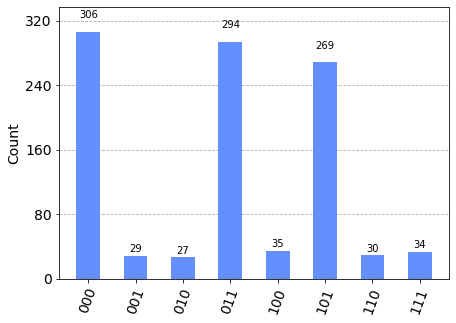

In [ ]:
#En la grafica podemos ver los posibles resultados, pero el que mas se hace exacto es el que queda como respuesta final
plot_histogram(result.circuit_results)

# Test de la implementacion en simulador

In [ ]:
import unittest

class TestSimulator(unittest.TestCase):

    def test_en_simulador(self):
        #Ejecutamos la instancia, el problema ya se encuentra definido
        grover = Grover(quantum_instance=quantum_instance)
        container = {'000','101','011'}
        self.assertIn(grover.amplify(problem).top_measurement,container)

unittest.main(argv=[''], verbosity=2, exit=False)

test_en_simulador (__main__.TestSimulator) ... ok
test_es_correcto (__main__.TestSimulator) ... ok
test_es_incorrecto (__main__.TestSimulator) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.243s

OK


# Implementacion en QPU

In [ ]:
from qiskit import IBMQ
IBMQ.enable_account('4471a42c70c0e2d1fca0cda782b943c4410a1db80dd2fde9179c846ea991763e3753637f264d1f91cb6046305c46b0947a819530366a53895127d081938f8c6f')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor


provider = IBMQ.get_provider(hub='ibm-q')

q = QuantumRegister(16,'q')
c = ClassicalRegister(16,'c')
problem = AmplificationProblem(oracle=oracle, is_good_state=v.es_correcto)
circuit = grover.construct_circuit(problem, max(result.iterations))
circuit.measure_all()

backend = provider.get_backend('ibmq_qasm_simulator')
job = execute(circuit, backend, shots=1)
                               
print('Ejecutando trabajo...\n')                 
job_monitor(job)
counts = job.result().get_counts()

print('RESULTADO: ',counts,'\n')

Ejecutando trabajo...

Job Status: job has successfully run
RESULTADO:  {'000': 1} 



In [ ]:
def extraerResultado(x):
  if x != 1:
    return True

for x in filter(extraerResultado, counts):
  resultado = x
  print(resultado)

000


# Test de la implementacion en QPU

In [ ]:
import unittest

class TestQPU(unittest.TestCase):

    def test_en_QPU(self):
        #Ejecutamos la instancia
        job = execute(circuit, backend, shots=1)
        job_monitor(job)
        counts = job.result().get_counts()
        for x in filter(extraerResultado, counts):
          resultado = x
        container = {'000','101','011'}
        self.assertIn(resultado,container)

unittest.main(argv=[''], verbosity=2, exit=False)

test_es_correcto (__main__.TestImplementacion) ... ok
test_es_incorrecto (__main__.TestImplementacion) ... ok
test_en_QPU (__main__.TestQPU) ... 

Job Status: job has successfully run


ok
test_en_simulador (__main__.TestSimulator) ... ok
test_es_correcto (__main__.TestSimulator) ... ok
test_es_incorrecto (__main__.TestSimulator) ... ok

----------------------------------------------------------------------
Ran 6 tests in 7.724s

OK


# Referencias

*   https://qiskit.org/textbook/ch-applications/satisfiability-grover.html

